In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Banglore Housing Prices.csv")

In [5]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df.dropna(inplace= True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Transform the size cols value to numerical values

In [8]:
df['size'] = df['size'].astype(str)
df['size'] = [int(value.split(' ')[0]) for value in df['size']]

In [9]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


# Transform the total_sqft col

In [10]:
def convert_sqft(value):
    parts = value.split('-')
    if len(parts) == 2:  # Check if the value is a range
        return sum(map(float, parts)) / 2  # Calculate the average of the range
    else:  # If the value is a single number
        try:
            return float(value)  # Convert it to float
        except ValueError:
            return float('nan')  # Return NaN for invalid values


In [11]:
df['total_sqft']=[convert_sqft(value) for value in df['total_sqft']]

In [12]:
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [13]:
df['total_sqft'].isnull().sum()

46

In [14]:

df.dropna(inplace=True)
df['total_sqft'].isnull().sum()

0

# Calculate and add one more column as ‘Price_Per_Sqft’

In [15]:
df['Price_per_sqft']=df['price']/df['total_sqft']

In [16]:
df.head()

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3.0,95.00,0.062459
4,Kothanur,2,1200.0,2.0,51.00,0.042500


# Remove the outliers from Price_Per_Sqft and BHK Size column


In [36]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from "Price_Per_Sqft" column
df = remove_outliers(df, "price")

# Remove outliers from "BHK_Size" column
df = remove_outliers(df, "size")
df


,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3.0,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,0.062459
4,Kothanur,2.0,1200.0,2.0,51.00,0.042500
...,...,...,...,...,...,...
13312,Bellandur,2.0,1262.0,2.0,47.00,0.037242
13313,Uttarahalli,3.0,1345.0,2.0,57.00,0.042379
13314,Green Glen Layout,3.0,1715.0,3.0,112.00,0.065306
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,60.00,0.052585


In [37]:
def remove_outliers(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return column[(column >= lower_bound) & (column <= upper_bound)]

In [38]:
df['Price_per_sqft'] = remove_outliers(df['Price_per_sqft'])

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


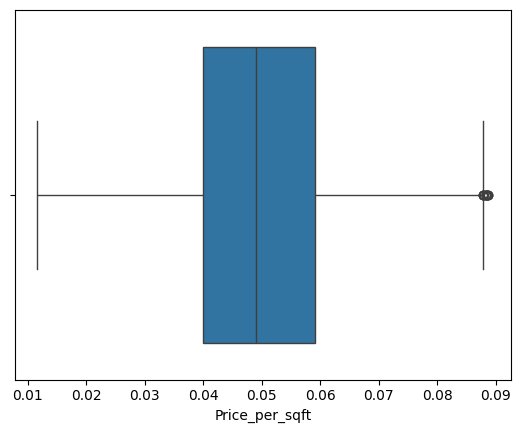

In [39]:
sns.boxplot(x=df['Price_per_sqft'])
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


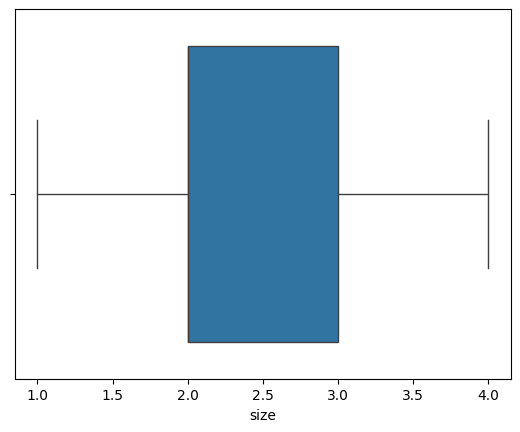

In [40]:
df['size'] = remove_outliers(df['size'])
sns.boxplot(x=df['size'])
plt.show()

In [22]:
df.isnull().sum()
df.dropna()

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3.0,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,0.062459
4,Kothanur,2.0,1200.0,2.0,51.00,0.042500
...,...,...,...,...,...,...
13314,Green Glen Layout,3.0,1715.0,3.0,112.00,0.065306
13316,Richards Town,4.0,3600.0,5.0,400.00,0.111111
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,60.00,0.052585
13318,Padmanabhanagar,4.0,4689.0,4.0,488.00,0.104073


In [43]:
# Split the dataset into features (X) and target variable (y)
X = df[["size", "total_sqft", "bath", "price"]]
y = df["price"]


In [44]:
X

,size,total_sqft,bath,price
0,2.0,1056.0,2.0,39.07
1,4.0,2600.0,5.0,120.00
2,3.0,1440.0,2.0,62.00
3,3.0,1521.0,3.0,95.00
4,2.0,1200.0,2.0,51.00
...,...,...,...,...
13312,2.0,1262.0,2.0,47.00
13313,3.0,1345.0,2.0,57.00
13314,3.0,1715.0,3.0,112.00
13317,2.0,1141.0,2.0,60.00


In [45]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13312     47.00
13313     57.00
13314    112.00
13317     60.00
13319     17.00
Name: price, Length: 10387, dtype: float64

In [46]:
df.isnull().sum()
df.dropna().isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
Price_per_sqft    0
dtype: int64

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)
y_pred

array([ 48.  ,  55.  ,  47.  , ...,  55.  ,  42.85, 140.  ])

# Evaluating the model using MSE, R-Square and Cross Validation

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
mse = mean_squared_error(y_test, y_pred)

In [64]:
r_squared = r2_score(y_test, y_pred)

In [67]:
# Perform cross-validation to get an estimate of the model's performance
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()

In [66]:
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2):", r_squared)
print("Mean Cross-Validated MSE:", mean_cv_mse)

Mean Squared Error (MSE): 4.985008705880267e-28
R-Squared (R^2): 1.0
Mean Cross-Validated MSE: 4.516035806167098e-28
